#  第二讲 复杂网络的统计特征一

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.16
### 依赖的第三方库：networkx==3.0, matplotlib==3.6.3, numpy==1.24.2, scipy==1.10.0, igraph==0.10.4

## 常见的度分布：泊松分布与幂律分布

### 泊松分布：以ER随机网络为例

In [2]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# 创建一个ER随机网络
n = 10000
p = 0.001
ER = nx.erdos_renyi_graph(n, p)

In [4]:
# 获取单个节点的度:G.degree(i)
ER.degree(1)

17

In [5]:
# 获取平均度
d = dict(nx.degree(ER))
print("平均度为：", sum(d.values())/len(ER.nodes))

平均度为： 9.985


In [6]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values())+1))
y = [i/n for i in nx.degree_histogram(ER)]

Text(0, 0.5, '$p_k$')

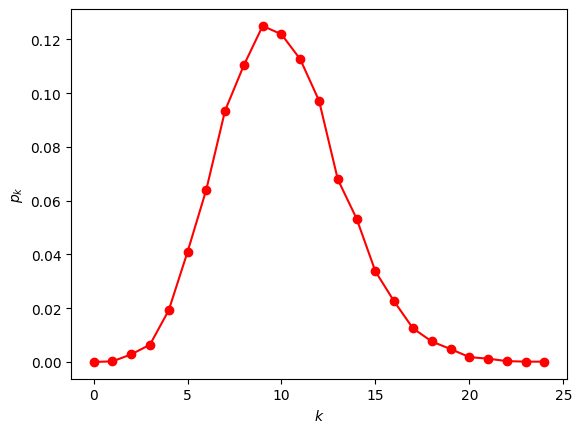

In [7]:
# 绘制度分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

### 幂律分布：以BA无标度网络为例

In [8]:
m = 3
BA = nx.barabasi_albert_graph(n, m)

In [9]:
# 获取平均度
d = dict(nx.degree(BA))
print("平均度为：", sum(d.values())/len(BA.nodes))

平均度为： 5.9982


Text(0, 0.5, '$p_k$')

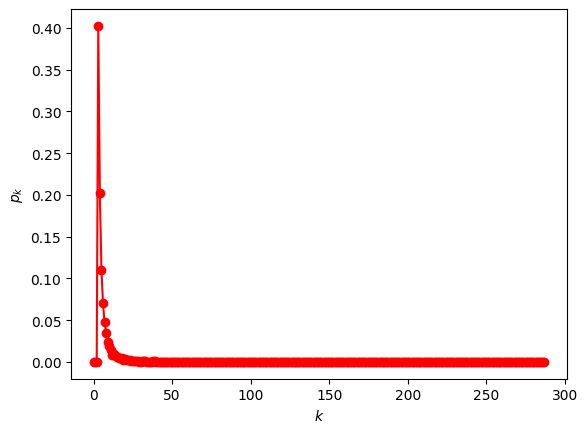

In [10]:
# 获取所有可能的度值对应的概率
x = list(range(max(d.values())+1))
y = [i/n for i in nx.degree_histogram(BA)]
# 绘制度分布
plt.plot(x, y, 'ro-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")

Text(0, 0.5, '$p_k$')

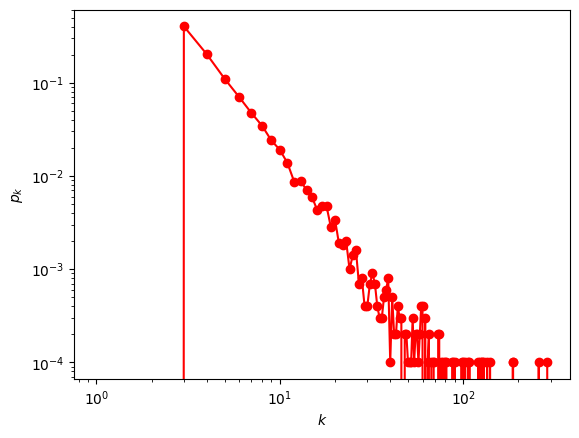

In [11]:
# 在双对数坐标轴下显示
plt.plot(x, y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

Text(0, 0.5, '$p_k$')

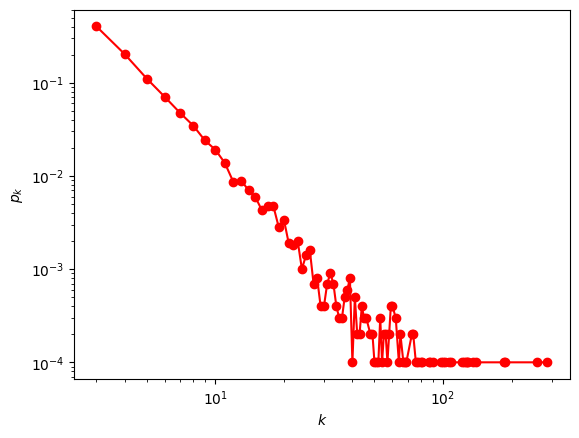

In [13]:
# 在双对数坐标轴下要把横坐标和纵坐标的0值排除掉
new_x = []
new_y = []
for i in range(len(x)):
    if y[i] != 0:
        new_x.append(x[i])
        new_y.append(y[i])
plt.plot(new_x, new_y, 'ro-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p_k$")

### 有向网络的入度、出度和总度值

In [14]:
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4])
DG.add_edges_from([(1,2),(1,4),(2,3),(4,3),(4,1)])
As = nx.adjacency_matrix(DG)
# 转化成二维数组形式的矩阵
A = As.todense()
print(A)

[[0 1 0 1]
 [0 0 1 0]
 [0 0 0 0]
 [1 0 1 0]]


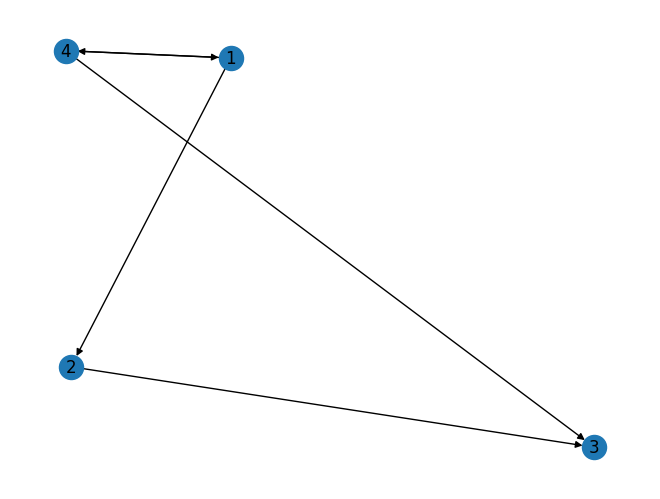

In [15]:
nx.draw(DG, with_labels=True)

In [16]:
for i in DG.nodes():
    # print(DG.in_degree(i))  # 入度
    # print(DG.out_degree(i)) # 出度
    print(DG.degree(i)) # 总度=入度+出度

3
2
2
3


## 网络的直径、效率和平均最短距离

### 直径

In [17]:
G1 = nx.barabasi_albert_graph(1000, 3)
print("网络的直径为：", nx.diameter(G1))

网络的直径为： 6


In [18]:
# 指定节点对i和j之间的效率：前提是这两个节点之家要有路径，即从i到j是可达的
print(nx.efficiency(G1, 1, 5))
print(nx.shortest_path_length(G1, 1, 5))

1.0
1


In [19]:
# 局部效率
print(nx.local_efficiency(G1))

0.027638483541180214


In [20]:
# 全局效率：直接调用下列函数的前提是网络G1要是连通的
print(nx.global_efficiency(G1))

0.3031567901242683


In [21]:
# 求整个网络的平均距离：直接调用下列函数的前提是网络G1要是连通的
print(nx.average_shortest_path_length(G1))

3.489065065065065


### 在计算大规模网络的有些特征时，networkx耗时很久，此时可选用一些其他高效的库，如igraph等。
### 关于igraph的基本使用方法可参阅入门教程：https://www.bilibili.com/video/BV1QR4y1R77f/?vd_source=519dd7a4b1f4260ebe31140657f52698 

In [22]:
import igraph as ig
import time

print(ig.__version__)

0.10.4


### 比如计算网络的直径

In [30]:
N, L = 5000, 25000
GNX = nx.gnm_random_graph(N, L)

# 确保生成的网络是连通的
while not nx.is_connected(GNX):
    GNX = nx.gnm_random_graph(N, L)

    
gig = ig.Graph.from_networkx(GNX)
    
# # 比较networkx和igraph的效率
t1 = time.perf_counter()
spl_nx = nx.average_shortest_path_length(GNX)
t2 = time.perf_counter()
print("networkx计算所需时间为：", t2-t1)

t3 = time.perf_counter()
spl_ig = gig.average_path_length()
t4 = time.perf_counter()
print("igraph计算所需时间为：", t4-t3)

networkx计算所需时间为： 45.9083134
igraph计算所需时间为： 1.6116715000000568


In [31]:
### 维纳指数的计算
print(nx.wiener_index(G1))

1741844.0


### 无向图和有向图的距离矩阵

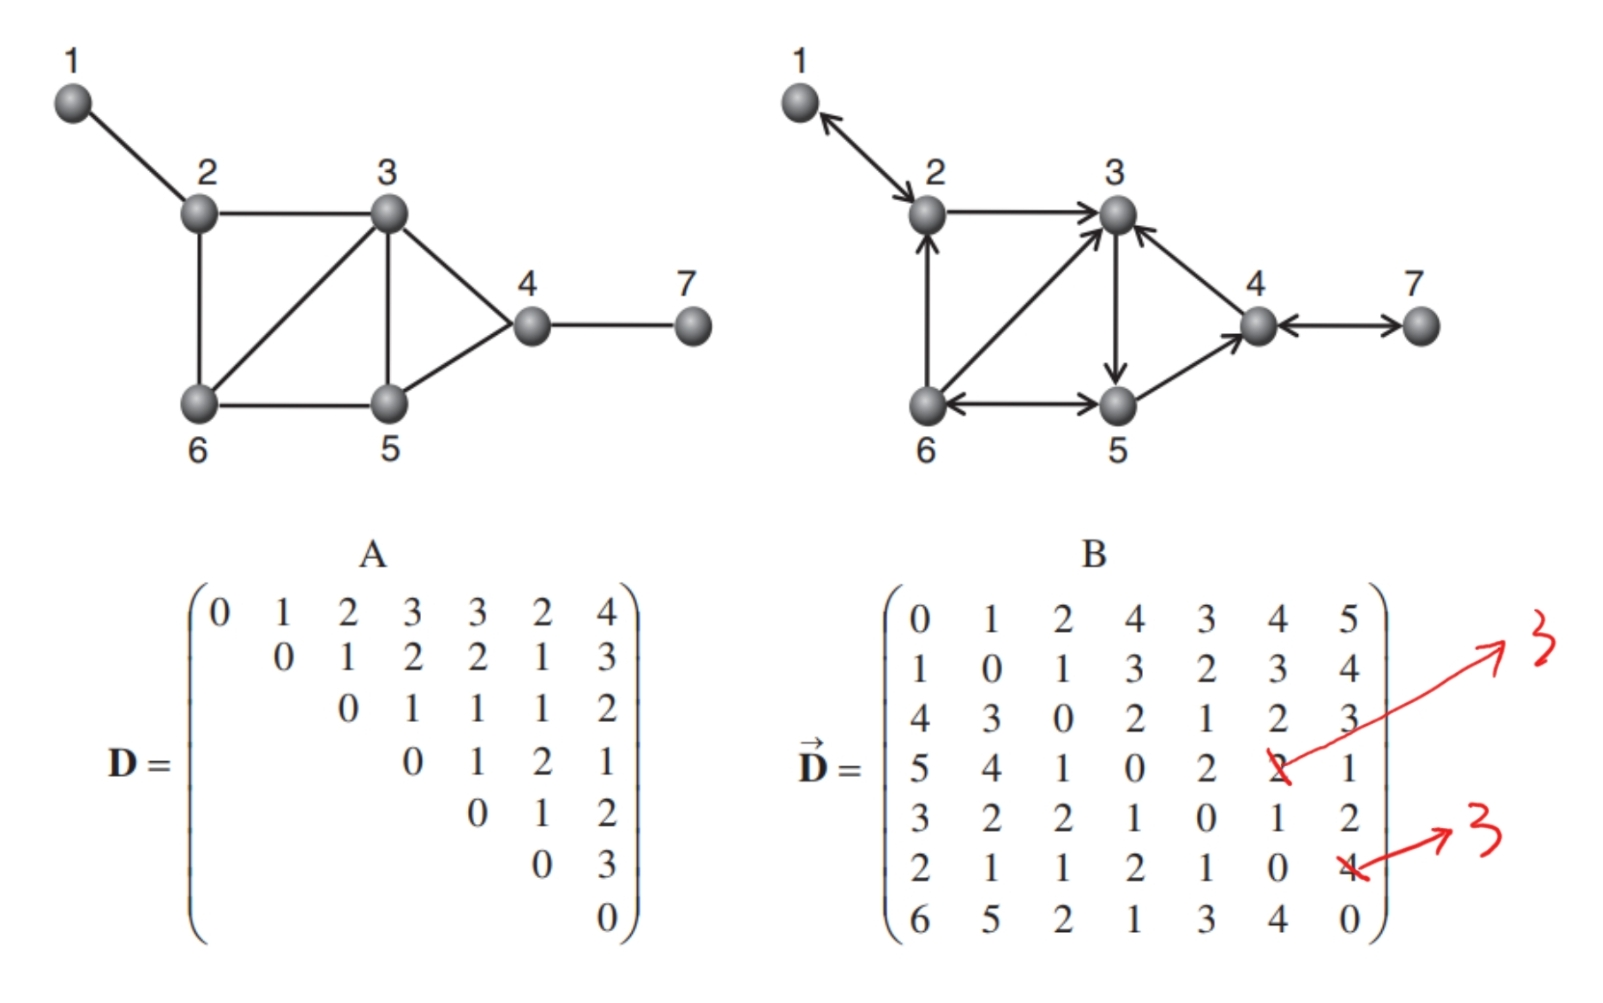

In [24]:
from IPython.display import Image
Image(filename = '距离.jpg', width=600, height=400)

In [ ]:
import numpy as np

In [40]:
UG = nx.Graph([(1,2),(2,3),(2,6),(3,4),(3,5),(3,6),(4,5),(4,7),(5,6)])
print(dict(nx.shortest_path_length(UG)))

{1: {1: 0, 2: 1, 3: 2, 6: 2, 4: 3, 5: 3, 7: 4}, 2: {2: 0, 1: 1, 3: 1, 6: 1, 4: 2, 5: 2, 7: 3}, 3: {3: 0, 2: 1, 4: 1, 5: 1, 6: 1, 1: 2, 7: 2}, 6: {6: 0, 2: 1, 3: 1, 5: 1, 1: 2, 4: 2, 7: 3}, 4: {4: 0, 3: 1, 5: 1, 7: 1, 2: 2, 6: 2, 1: 3}, 5: {5: 0, 3: 1, 4: 1, 6: 1, 2: 2, 7: 2, 1: 3}, 7: {7: 0, 4: 1, 3: 2, 5: 2, 2: 3, 6: 3, 1: 4}}


In [42]:
D = np.array([nx.shortest_path_length(UG, i, j) for i in range(1,8) for j in range(1,8)]).reshape(7,7)
D

array([[0, 1, 2, 3, 3, 2, 4],
       [1, 0, 1, 2, 2, 1, 3],
       [2, 1, 0, 1, 1, 1, 2],
       [3, 2, 1, 0, 1, 2, 1],
       [3, 2, 1, 1, 0, 1, 2],
       [2, 1, 1, 2, 1, 0, 3],
       [4, 3, 2, 1, 2, 3, 0]])

In [56]:
DG = nx.DiGraph([(1,2),(2,1),(2,3),(3,5),(4,3),(4,7),(5,4),(5,6),(6,2),(6,3),(6,5),(7,4)])
print(dict(nx.shortest_path_length(DG)))

{1: {1: 0, 2: 1, 3: 2, 5: 3, 4: 4, 6: 4, 7: 5}, 2: {2: 0, 1: 1, 3: 1, 5: 2, 4: 3, 6: 3, 7: 4}, 3: {3: 0, 5: 1, 4: 2, 6: 2, 2: 3, 7: 3, 1: 4}, 5: {5: 0, 4: 1, 6: 1, 2: 2, 3: 2, 7: 2, 1: 3}, 4: {4: 0, 3: 1, 7: 1, 5: 2, 6: 3, 2: 4, 1: 5}, 7: {7: 0, 4: 1, 3: 2, 5: 3, 6: 4, 2: 5, 1: 6}, 6: {6: 0, 2: 1, 3: 1, 5: 1, 1: 2, 4: 2, 7: 3}}


In [57]:
D2 = np.array([nx.shortest_path_length(DG, i, j) for i in range(1,8) for j in range(1,8)]).reshape(7,7)
D2

array([[0, 1, 2, 4, 3, 4, 5],
       [1, 0, 1, 3, 2, 3, 4],
       [4, 3, 0, 2, 1, 2, 3],
       [5, 4, 1, 0, 2, 3, 1],
       [3, 2, 2, 1, 0, 1, 2],
       [2, 1, 1, 2, 1, 0, 3],
       [6, 5, 2, 1, 3, 4, 0]])

In [64]:
# 两个节点间的最短路径数
print(list(nx.all_shortest_paths(UG, 1, 5)))
print(len(list(nx.all_shortest_paths(UG, 1, 5))))

[[1, 2, 3, 5], [1, 2, 6, 5]]
2


## 节点的集聚系数和平均集聚系数

### 集聚系数

In [65]:
print(nx.clustering(UG)) # 以字典的形式打印所有节点的局部集聚系数

{1: 0, 2: 0.3333333333333333, 3: 0.5, 6: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.6666666666666666, 7: 0}


### 平均集聚系数

In [66]:
print(nx.average_clustering(UG))

0.35714285714285715


### 全局集聚系数

In [67]:
print(nx.transitivity(UG))

0.5


### 有向网络的互惠性

In [71]:
print(nx.number_of_edges(DG))

12


In [79]:
rec = {i: nx.reciprocity(DG, i) for i in DG.nodes()}
print(rec)

{1: 1.0, 2: 0.5, 3: 0.0, 5: 0.5, 4: 0.5, 7: 1.0, 6: 0.5}


In [80]:
print(nx.reciprocity(DG))  # 6/12

0.5


## 介数和核度

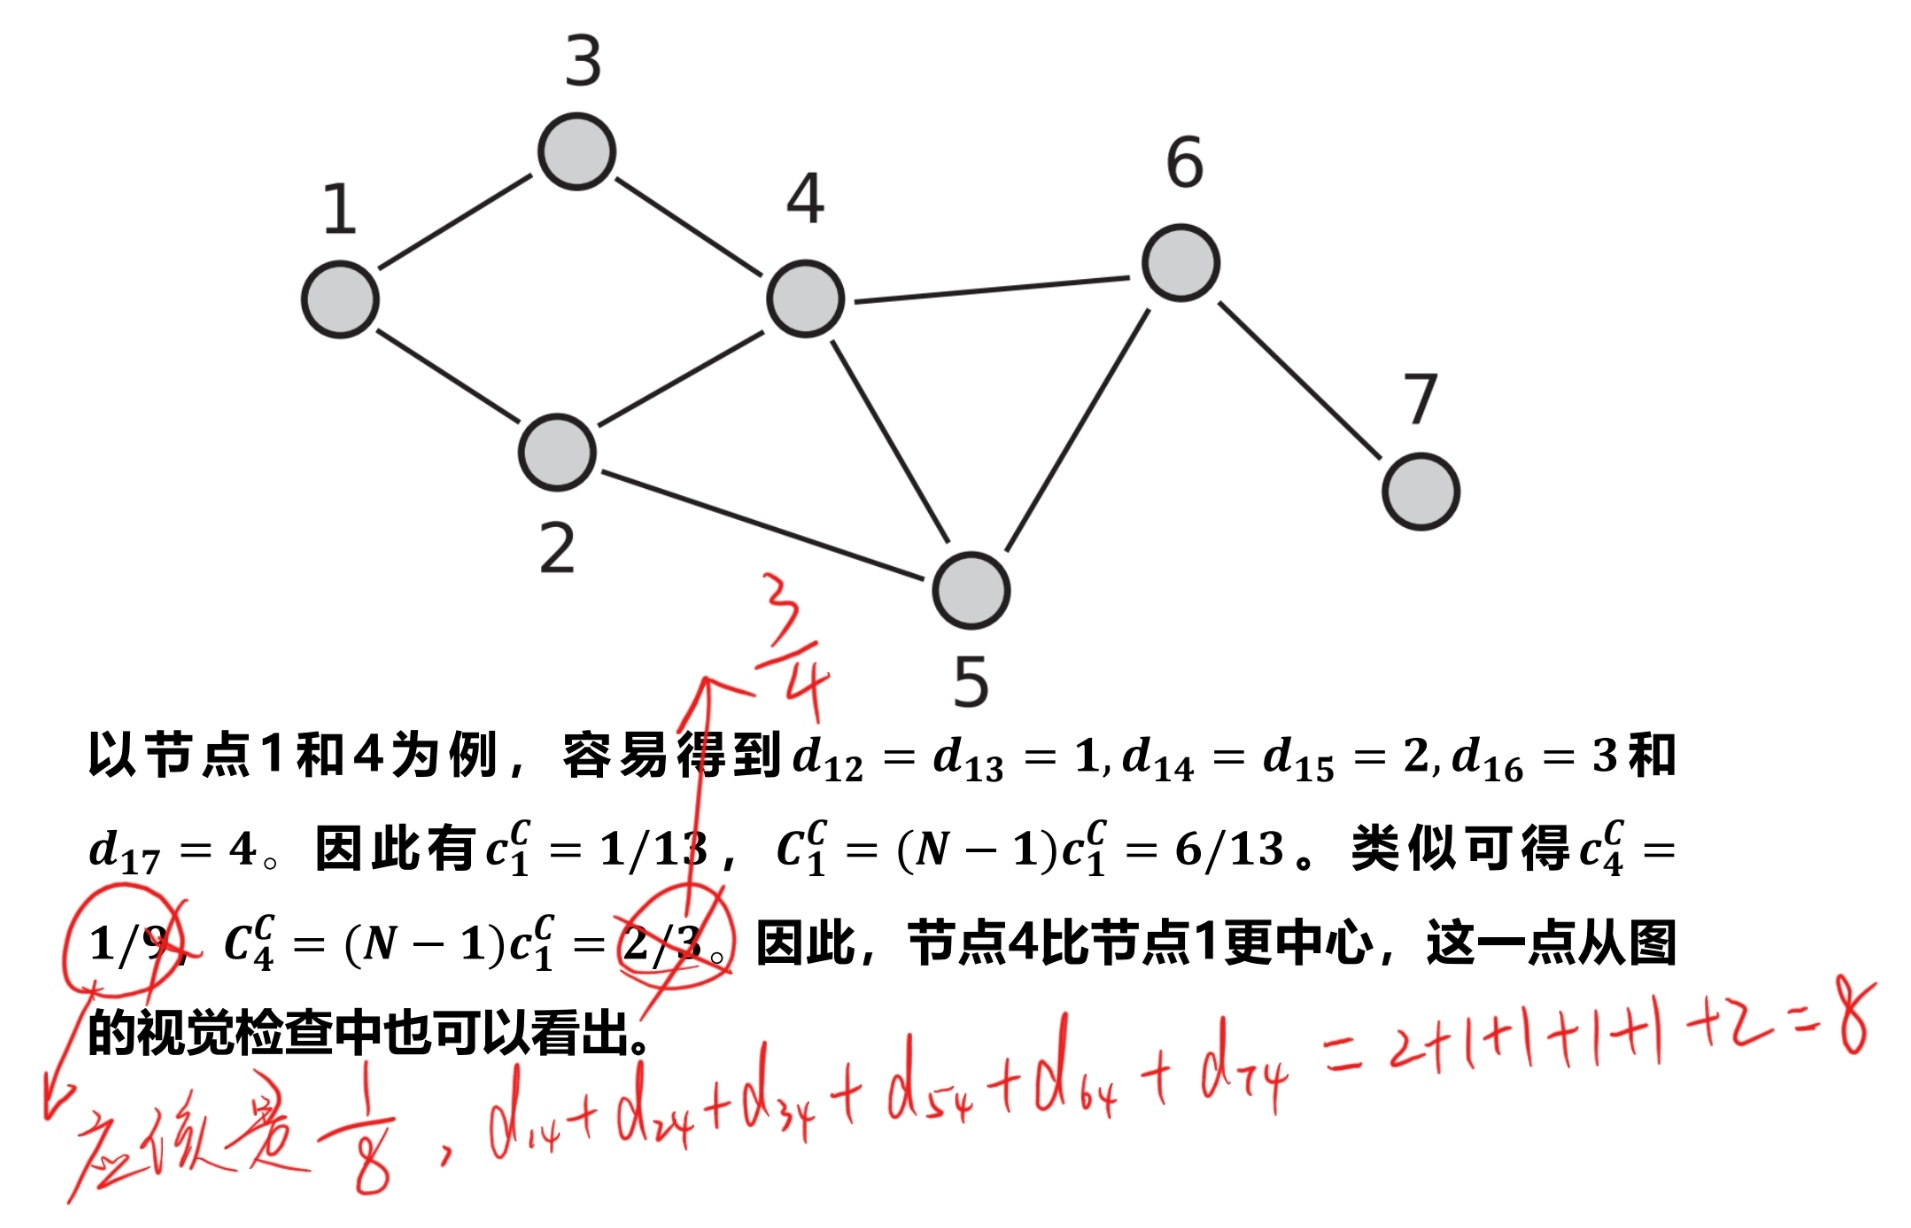

In [25]:
Image(filename = '接近度中心性.jpg', width=600, height=400)

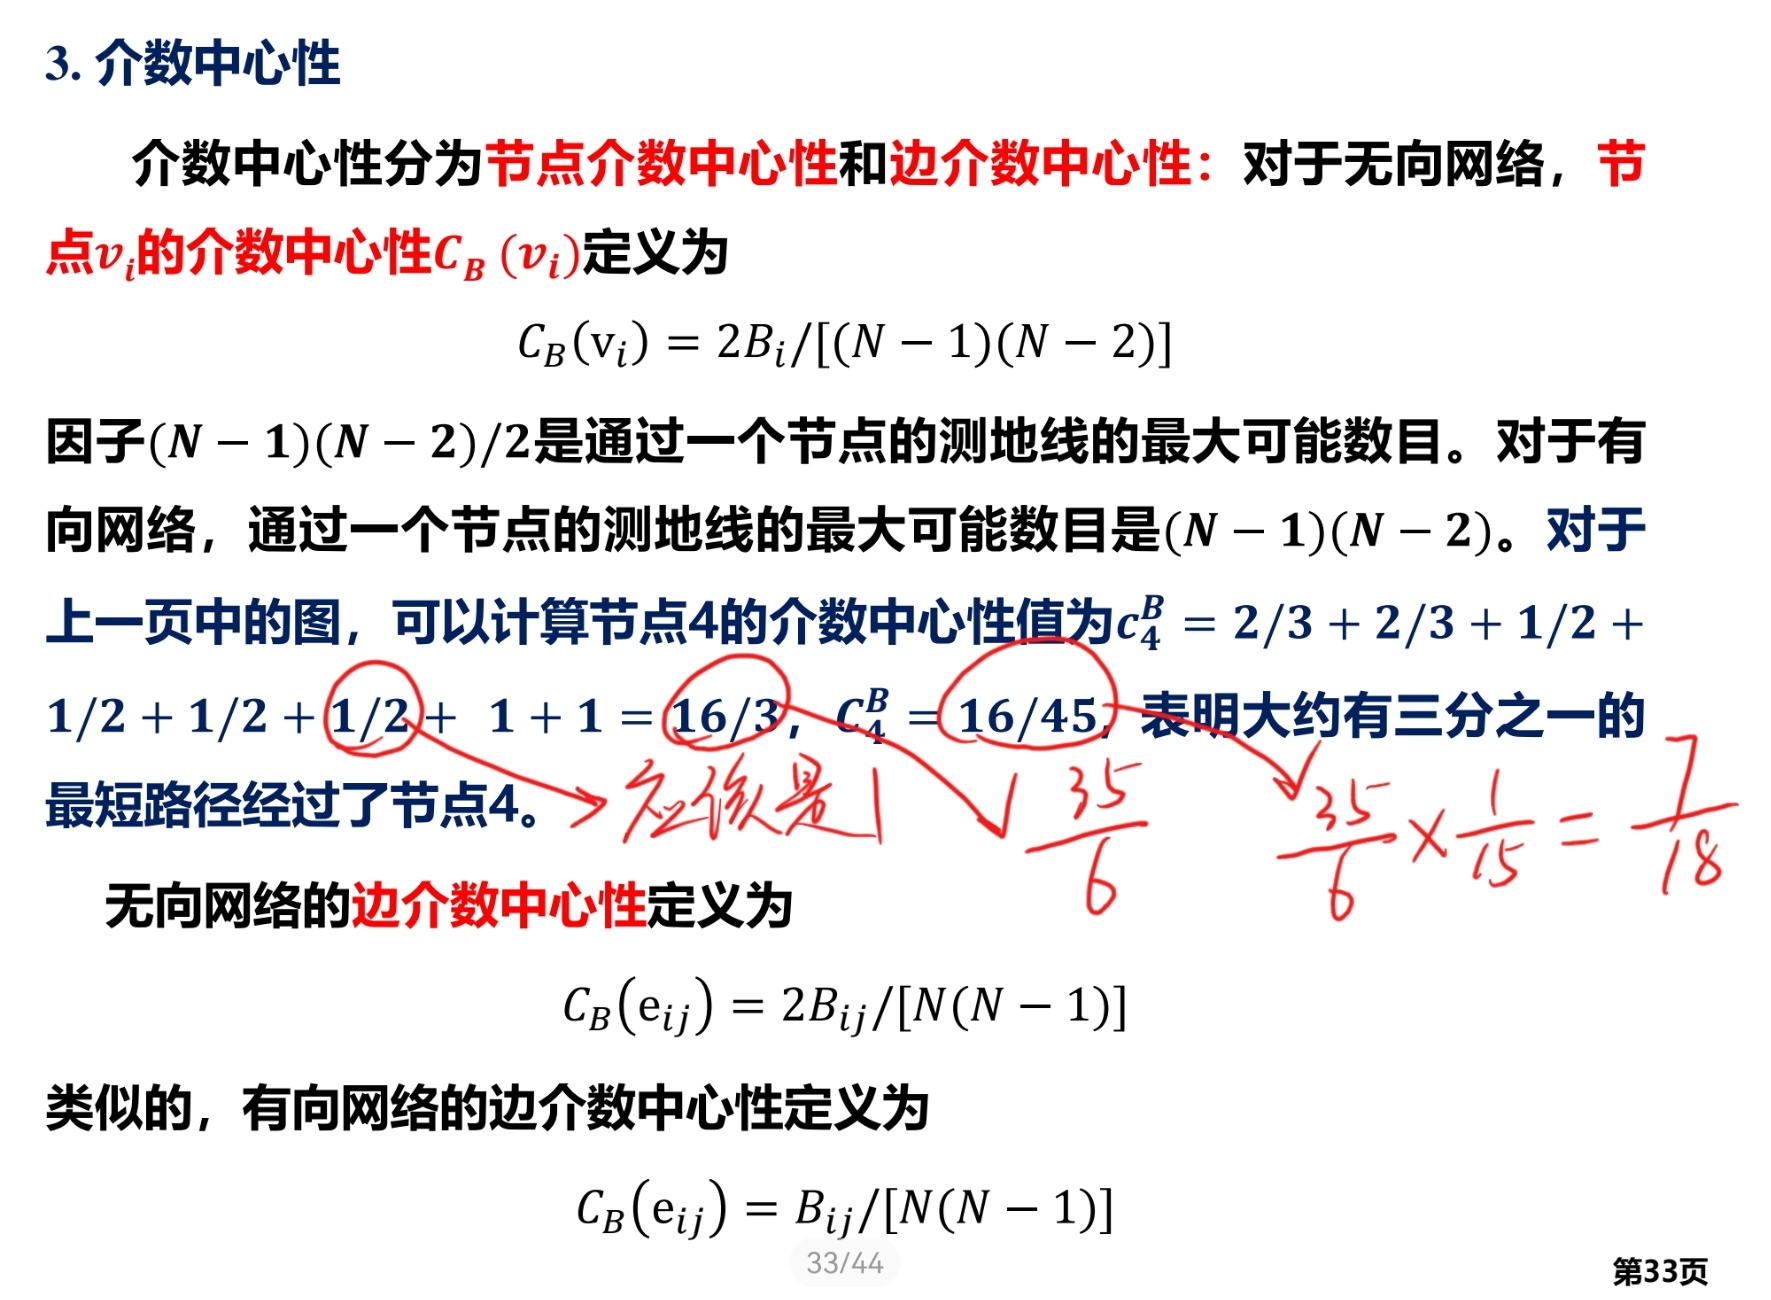

In [26]:
Image(filename = '介数中心性.jpg', width=600, height=400)

In [89]:
G = nx.Graph([(1,2),(1,3),(2,4),(2,5),(3,4),(4,5),(4,6),(5,6),(6,7)])
bc = nx.betweenness_centrality(G, normalized=True)
print(bc)

{1: 0.03333333333333333, 2: 0.18888888888888888, 3: 0.07777777777777777, 4: 0.38888888888888884, 5: 0.1111111111111111, 6: 0.3333333333333333, 7: 0.0}


In [95]:
# print(nx.closeness_centrality(G))

{1: 0.46153846153846156, 2: 0.6, 3: 0.5454545454545454, 4: 0.75, 5: 0.6666666666666666, 6: 0.6, 7: 0.4}


### 边介数

In [91]:
ebc = nx.edge_betweenness_centrality(G)
print(ebc)

{(1, 2): 0.2063492063492063, (1, 3): 0.12698412698412695, (2, 4): 0.17460317460317457, (2, 5): 0.17460317460317457, (3, 4): 0.2698412698412698, (4, 5): 0.09523809523809523, (4, 6): 0.30158730158730157, (5, 6): 0.1746031746031746, (6, 7): 0.2857142857142857}


### 核度

In [92]:
ks = nx.core_number(G)
print(ks)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1}


## 团和k-分量

In [97]:
print(list(nx.enumerate_all_cliques(G))) # 返回无向图中的所有团

[[1], [2], [3], [4], [5], [6], [7], [1, 2], [1, 3], [2, 4], [2, 5], [3, 4], [4, 5], [4, 6], [5, 6], [6, 7], [2, 4, 5], [4, 5, 6]]


In [103]:
# 计算k分量
from networkx.algorithms import approximation as apxa
k_components = apxa.k_components(G)
k_components

defaultdict(list, {1: [{1, 2, 3, 4, 5, 6, 7}], 2: [{1, 2, 3, 4, 5, 6}]})

### 网络密度

In [104]:
print(nx.density(G))

0.42857142857142855
